## DAB200 -- Lab 4

In this lab, you will gain some experience in **denoising** a dataset in the context of a specific objective. 

**Overall Objective**: Create a model that predicts rent prices as well as possible for typical New York City apartments.

### Part 1 - Create and evaluate an initial model

#### Code (15 marks)

In [2]:
import pandas as pd
rent = pd.read_csv('C:/Users/moham/Downloads/rent_3.csv')


In [3]:
rent.head(3)

,Unnamed: 0,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,longitude,manager_id,photos,price,street_address,interest_level,num_features
0,0,1.0,0,e7332bbe70e21bd8d4edf363a078b8e0,2016-06-15 02:41:05,"Studio Apts Furnished, Hardwood Floors, Queen ...",East 60th Street,"['Doorman', 'Elevator', 'Dogs Allowed', 'Cats ...",40.7604,-73.9617,1eb0885296be366e78d93c4a31fee644,['https://photos.renthop.com/2/7162265_1f735c6...,2750,351 East 60th Street,low,4
1,1,1.0,3,5fb96990fbab79e8b88707fb477eec2f,2016-06-13 12:19:48,\rThank you very much for the opportunity to f...,85 John st,"['Cats Allowed', 'Dogs Allowed', 'Elevator']",40.7085,-74.0064,46f0c2d3ec259176e74bd67d5d4e22ff,['https://photos.renthop.com/2/7155595_de331ec...,5100,85 John st,low,3
2,2,1.0,1,f48ca8e7c1e3089206d249d885b7222a,2016-05-07 02:25:19,Spacious and bright Queen sized BDRM situated ...,E 90 Street,[],40.7795,-73.9482,11c00e995d6b314daa729b6ab9b9112c,['https://photos.renthop.com/2/6977978_7e470a3...,2050,336 E 90 Street,low,1


In [4]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20000 non-null  int64  
 1   bathrooms        20000 non-null  float64
 2   bedrooms         20000 non-null  int64  
 3   building_id      20000 non-null  object 
 4   created          20000 non-null  object 
 5   description      19431 non-null  object 
 6   display_address  19943 non-null  object 
 7   features         20000 non-null  object 
 8   latitude         20000 non-null  float64
 9   longitude        20000 non-null  float64
 10  manager_id       20000 non-null  object 
 11  photos           20000 non-null  object 
 12  price            20000 non-null  int64  
 13  street_address   19994 non-null  object 
 14  interest_level   20000 non-null  object 
 15  num_features     20000 non-null  int64  
dtypes: float64(3), int64(4), object(9)
memory usage: 2.4+ MB


In [5]:
rent.isnull().sum()

Unnamed: 0           0
bathrooms            0
bedrooms             0
building_id          0
created              0
description        569
display_address     57
features             0
latitude             0
longitude            0
manager_id           0
photos               0
price                0
street_address       6
interest_level       0
num_features         0
dtype: int64

In [6]:
rent_num = rent[['bathrooms', 'bedrooms', 'longitude', 'latitude', 'price']]

rent_num.head(3)

,bathrooms,bedrooms,longitude,latitude,price
0,1.0,0,-73.9617,40.7604,2750
1,1.0,3,-74.0064,40.7085,5100
2,1.0,1,-73.9482,40.7795,2050


In [7]:
rent_num.isnull().sum()

bathrooms    0
bedrooms     0
longitude    0
latitude     0
price        0
dtype: int64

### create and evaluate Model

In [8]:
rent_num.drop('price', axis=1)

,bathrooms,bedrooms,longitude,latitude
0,1.0,0,-73.9617,40.7604
1,1.0,3,-74.0064,40.7085
2,1.0,1,-73.9482,40.7795
3,1.5,3,-73.9782,40.7426
4,1.0,2,-73.9187,40.6996
...,...,...,...,...
19995,2.0,2,-73.9860,40.7609
19996,1.0,1,-73.9457,40.7165
19997,1.0,1,-73.9460,40.6296
19998,1.5,2,-73.9901,40.7239


In [9]:
X = rent_num.drop('price', axis=1)
y = rent_num['price']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

In [11]:
#Running this cell you will get different scores each run!
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)  

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True) 

rf.fit(X_train, y_train) 

rf.score(X_train, y_train)

0.9304604885062123

In [12]:
rf.oob_score_

0.646845271457002

In [13]:
rf.score(X_val, y_val)

0.645615892063415

In [14]:
avg_preds = [np.mean(y_train)] * len(y_val)

print(np.mean(y_train))

r2_score(y_val, avg_preds) 

3641.727375


-5.958742263167949e-06

In [15]:
#Run the Random forest 10 times (different random cuts and out of bags)
train_r2 = []
train_mae = []
val_r2 = []
val_mae = []
oob_scores = []

for i in range(10):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True) 
    rf.fit(X_train, y_train)
    train_preds = rf.predict(X_train)
    val_preds = rf.predict(X_val)
    train_r2.append(round(r2_score(y_train, train_preds), 2))
    val_r2.append(round(r2_score(y_val, val_preds), 2))
    train_mae.append(round(mean_absolute_error(y_train, train_preds), 0))
    val_mae.append(round(mean_absolute_error(y_val, val_preds), 0))
    oob_scores.append(rf.oob_score_)

In [16]:
print("Train r2 scores: \n", train_r2)
print("")
print("Validation r2 scores: \n", val_r2)
print("")
print("Train MAE scores: \n", train_mae)
print("")
print("Validation MAE scores: \n", val_mae)
print("")
print("Out-of-bag scores: \n", oob_scores)

Train r2 scores: 
 [0.93, 0.93, 0.93, 0.93, 0.92, 0.93, 0.92, 0.93, 0.93, 0.93]

Validation r2 scores: 
 [0.73, 0.67, 0.58, 0.71, 0.59, 0.74, 0.76, 0.6, 0.8, 0.58]

Train MAE scores: 
 [238.0, 234.0, 235.0, 239.0, 237.0, 238.0, 239.0, 232.0, 240.0, 235.0]

Validation MAE scores: 
 [450.0, 472.0, 478.0, 436.0, 458.0, 448.0, 452.0, 463.0, 436.0, 478.0]

Out-of-bag scores: 
 [0.590329936567758, 0.6102345238595757, 0.6266061489211834, 0.5999944621438713, 0.6276508483595045, 0.5838100249219171, 0.5694933721135399, 0.6594536180639454, 0.5963330158019364, 0.6190654099403388]


#### Explanation (5 marks)

Please provide an explanation and justification for the code submitted in **Part 1** in the context of the overall objective. 

### Part 2 - Denoise the data

This section should include the code necessary to **denoise** the data, and it should include what is needed to identify inconsistencies, problems, errors, etc. in the data. 

#### Code (25 marks)

In [17]:
rent_num.iloc[1100,:]

bathrooms       2.0000
bedrooms        2.0000
longitude     -73.9425
latitude       40.7875
price        3395.0000
Name: 1100, dtype: float64

In [18]:
rent_num.bathrooms.idxmax()

11593

In [19]:
rent_num.iloc[11593,:]

bathrooms      10.0000
bedrooms        2.0000
longitude     -73.9849
latitude       40.7633
price        3600.0000
Name: 11593, dtype: float64

In [20]:
rent_num.describe()

,bathrooms,bedrooms,longitude,latitude,price
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,1.207275,1.530650,-73.815636,40.692162,3640.519550
std,0.492201,1.104953,6.761947,2.370961,2344.670775
min,0.000000,0.000000,-118.271000,-39.232000,-20000.000000
25%,1.000000,1.000000,-73.991700,40.728200,2500.000000
50%,1.000000,1.000000,-73.978000,40.751600,3150.000000
75%,1.000000,2.000000,-73.954800,40.774200,4095.000000
max,10.000000,8.000000,157.692000,53.870500,100000.000000


In [21]:
rent_num["price"].describe()

count     20000.000000
mean       3640.519550
std        2344.670775
min      -20000.000000
25%        2500.000000
50%        3150.000000
75%        4095.000000
max      100000.000000
Name: price, dtype: float64

In [22]:
rent_num['price'].sort_values(ascending=False).to_frame().head(10) 

,price
8734,100000
17530,80000
1397,55000
12965,53100
14622,50000
13659,37000
8711,35000
18944,30000
17815,30000
15469,30000


In [23]:
rent_num['bathrooms'].value_counts().to_frame()

,bathrooms
1.0,16017
2.0,3065
3.0,305
1.5,266
0.0,132
2.5,123
4.0,45
3.5,27
4.5,11
5.0,4


In [24]:
rent_num['bedrooms'].value_counts().to_frame()

,bedrooms
1,6392
2,5971
0,3867
3,2920
4,751
5,82
6,15
8,1
7,1


In [25]:
#Look at the maximum and minimum values of the longitude!
rent_num.longitude.describe()

count    20000.000000
mean       -73.815636
std          6.761947
min       -118.271000
25%        -73.991700
50%        -73.978000
75%        -73.954800
max        157.692000
Name: longitude, dtype: float64

In [26]:
#Let us find the flat with the minimum longitude of -118.271
rent_num.longitude.idxmin()

2187

In [27]:
rent_num.iloc[2187,:]

bathrooms       1.0000
bedrooms        1.0000
longitude    -118.2710
latitude       34.0126
price        2425.0000
Name: 2187, dtype: float64

In [28]:
#Look at the maximum and minimum values of the latitude!
rent_num.latitude.describe()

count    20000.000000
mean        40.692162
std          2.370961
min        -39.232000
25%         40.728200
50%         40.751600
75%         40.774200
max         53.870500
Name: latitude, dtype: float64

In [29]:
#Check if we have any flats longitude = 0 and latitude = 0
((rent_num['longitude'] == 0.0) & (rent_num['latitude'] == 0.0)).any()

True

In [30]:
#How many flats longitude = 0
((rent_num['longitude'] == 0.0) & (rent_num['latitude'] == 0.0)).sum()

4

In [31]:
rent_num[(rent_num['longitude'] == 0.0) & (rent_num['latitude'] == 0.0)]

,bathrooms,bedrooms,longitude,latitude,price
2696,1.0,1,0.0,0.0,3495
7700,1.0,1,0.0,0.0,1750
14156,1.0,2,0.0,0.0,4395
14567,1.0,2,0.0,0.0,3200


In [32]:
rent_clean = rent_num[(rent_num['price'] > 1000) & (rent_num['price'] < 10000)]

In [33]:
#size before the cleanup
rent_num.shape

(20000, 5)

In [34]:
#size after the cleanup
rent_clean.shape

(19599, 5)

Text(0, 0.5, 'Num Apts at that price')

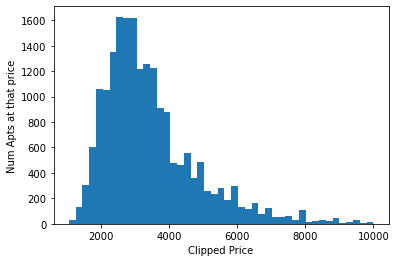

In [35]:
#look at the distribution of the price
import matplotlib.pyplot as plt

plt.hist(rent_clean['price'], bins=45)
plt.xlabel('Clipped Price')
plt.ylabel('Num Apts at that price')

In [36]:
#Remove flats that have longitude or latitude as 0
rent_clean = rent_clean[(rent_clean['longitude'] !=0) | (rent_clean['latitude']!=0)]

In [37]:
rent_clean.shape

(19595, 5)

In [38]:
#Let us have a look at the flat's location with index 0
#We will use google maps to check the actual location of the flat [[40.711, -73.954]]
rent_clean.iloc[0,2:4]

longitude   -73.9617
latitude     40.7604
Name: 0, dtype: float64

### Part 3 - Create and evaluate a final model

Create the final model using the deonised data, compare the original models and the new model using oob **score** and the **R-squared**.

#### Code (15 marks)

In [39]:
X_clean = rent_clean.drop('price', axis=1)
y_clean = rent_clean['price']

In [40]:
X_clean_train, X_clean_val, y_clean_train, y_clean_val = train_test_split(X_clean, y_clean, test_size=0.2)  

rf_clean = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True) 

rf_clean.fit(X_clean_train, y_clean_train) 

rf_clean.score(X_clean_train, y_clean_train)

0.9501416655824322

In [41]:
rf_clean.oob_score_

0.8139806929572422

In [42]:
rf_clean.score(X_clean_val, y_clean_val)

0.7987799065431589

In [44]:
#Run the Random forest 10 times (different random cuts and out of bags)
train_r2 = []
train_mae = []
val_r2 = []
val_mae = []
oob_scores = []

for i in range(10):
    X_clean_train, X_clean_val, y_clean_train, y_clean_val = train_test_split(X_clean, y_clean, test_size=0.2)
    rf_clean = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True) 
    rf_clean.fit(X_clean_train, y_clean_train)
    train_preds = rf_clean.predict(X_clean_train)
    val_preds = rf_clean.predict(X_clean_val)
    train_r2.append(round(r2_score(y_clean_train, train_preds), 4))
    val_r2.append(round(r2_score(y_clean_val, val_preds), 4))
    train_mae.append(round(mean_absolute_error(y_clean_train, train_preds), 0))
    val_mae.append(round(mean_absolute_error(y_clean_val, val_preds), 0))
    oob_scores.append(round(rf_clean.oob_score_, 4))


In [47]:
print("After cleaning: \n")
print("Train r2 scores: \n", train_r2)
print("")
print("Validation r2 scores: \n", val_r2)
print("")
print("Train MAE scores: \n", train_mae)
print("")
print("Validation MAE scores: \n", val_mae)
print("")
print("Validation OOB scores: \n", oob_scores)

After cleaning: 

Train r2 scores: 
 [0.9484, 0.9488, 0.9528, 0.9515, 0.9489, 0.9502, 0.9515, 0.9484, 0.9493, 0.9489]

Validation r2 scores: 
 [0.823, 0.8091, 0.7848, 0.7958, 0.8335, 0.8238, 0.805, 0.8046, 0.8109, 0.8248]

Train MAE scores: 
 [191.0, 192.0, 186.0, 188.0, 191.0, 189.0, 189.0, 190.0, 190.0, 191.0]

Validation MAE scores: 
 [348.0, 350.0, 371.0, 365.0, 341.0, 351.0, 353.0, 361.0, 355.0, 346.0]

Validation OOB scores: 
 [0.8063, 0.8105, 0.8209, 0.8131, 0.8053, 0.808, 0.8142, 0.8105, 0.8121, 0.8058]


In [48]:
print("Mean train r2: ", round(np.mean(train_r2), 4))
print("Mean validation r2: ", round(np.mean(val_r2), 4))
print("Mean train MAE: ", round(np.mean(train_mae), 0))
print("Mean validation MAE: ", round(np.mean(val_mae), 0))
print('OOB Score:',(rf_clean.oob_score_*100).round(3))


Mean train r2:  0.9499
Mean validation r2:  0.8115
Mean train MAE:  190.0
Mean validation MAE:  354.0
OOB Score: 80.585


In [ ]:
##Part3- Explanation:
since we want to predict price we moved it in y_clean and removed from X_clean, then we are splitting the train and test data by using train_test_split
and passing X_clean, y_clean as params.Then we are applying RandomForestRegressor which consists of params n_estimators which we took 100 that means it creates 100 number of trees to build before taking the maximum voting or averages of predictions.
Then n_jobs :
This parameter tells the engine how many processors is it allowed to use. A value of “-1” means there is no restriction whereas a value of “1” means it can only use one processor.
oob_score :This is a random forest cross validation method. It is very similar to leave one out validation technique, however, this is so much faster. This method simply tags every observation used in different tress. And then it finds out a maximum vote score for every observation based on only trees which did not use this particular observation to train itself.
Then we use .fit() to train it, and then call .score() to get scores.
then we loop the model 10 times to check the results how it changes everytime.
Model is giving R2 as 81% and OOB as 80.5%.
It is suggested to consider OOB score for evaluation and given importance than R squared error.

#### Explanation (5 marks)

Please provide an explanation and justification for the code submitted in **Part 3** in the context of the overall objective. 

### Part 4 - Document the problems (35 marks)

In this part, please use the table below to document your understanding of all the data issues you discovered. Note that **no code** should be included, as that should be covered in **Part 2**. Also, note that even if one line of code fixed a few problems, you should list each problem separately in the table below, so be sure you have investigated the data properly. For example, if the list `[-6, 5, 0, 50]` represents heights of adults, the -6, 0, and 50 would represent three data issues to be included in the table below, even though one line of code may be able to address all of them. 

| Data issue discovered | Why is this a problem? | How did you fix it? | Why is this fix appropriate? |
| :- | :- | :- | :- | 
|  example problem 1  | example explanation    | example fix  | example explanation about why this fix is appropriate   |
|  example problem 2  | example explanation    | example fix  | example explanation about why this fix is appropriate   |


In [ ]:
In the beginning removed few columns	 The columns which are not being considered important are removed from the data so as to improve the accuracy of the model and make it faster with only relevant data.
The columns removed are mostly text namely: Building ID, Created, Unnamed, Description, Display_Address, Manager_id , Photos ,Street_address 
removing data with latitude and longitude 0 	 there must be some error with the data entry as lat and long 0 lies in atlantic ocean.
The final results overall are good with
#R2 score: 81.15
#MAE:  354.0
#OOB Score: 80.585